In [154]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets as datasets
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import torchvision.transforms as transform
t = transform.Compose([
    transform.RandomHorizontalFlip(0.5),
    transform.RandomVerticalFlip(0.5),
    transform.ToTensor(),
    transform.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=t)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=t)
trainloader = torch.utils.data.DataLoader(train_data,batch_size=20, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data,batch_size=20)

Files already downloaded and verified
Files already downloaded and verified


In [155]:
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()
        self.conv1 = nn.Conv2d(3,20,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(20,30,5)
        self.fc1 = nn.Linear(30*10*10,75)
        self.fc2 = nn.Linear(75,2)
    
    def forward(self,image):
        image = F.relu(self.conv1(image))
        image = self.pool(image)
        image = F.relu(self.conv2(image))
        image = image.view(-1,30*10*10)
        image = F.relu(self.fc1(image))
        image = self.fc2(image)
        
        return image       

In [156]:
net = NN()
CEloss = nn.CrossEntropyLoss()
SGD_optim = torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [ ]:
cum_trainlossarray = []
cum_testlossarray = []
count = 25
for epoch in range(count):
        traincount = 0
        cum_trainloss = 0
        net.train()
        for images, labels in trainloader:
            images = images[labels<2]
            labels = labels[labels<2]

            if(labels.size(0)==0):
                continue

            traincount += images.size(0)
            # print(count)
        
            #    print(images.size())
            # print(labels.size())

            loss1 = net(images)
            #    print(loss1.size())
            trainloss = CEloss(loss1,labels)
            SGD_optim.zero_grad()
            trainloss.backward()
            SGD_optim.step()
            cum_trainloss += trainloss.item()*images.size(0)

        accuracy = 0
        testcount = 0
        cum_testloss = 0
        correct = 0
        for images, labels in testloader:
            images = images[labels<2]
            labels = labels[labels<2]

            if(labels.size(0)==0):
                continue

            testcount += images.size(0)

            testloss = CEloss(net(images),labels)
            cum_testloss += testloss.item()*images.size(0)

            predict_prob = net(images)
            _,out = torch.max(predict_prob.data,1)  

            for i in range(len(labels)):
                if labels[i] == out[i]:
                    correct += 1 


        accuracy = correct/testcount
        cum_trainlossarray.append(cum_trainloss/traincount)
        cum_testlossarray.append(cum_testloss/testcount)

        print(f"Epoch {epoch}.." f"Train_loss: {cum_trainloss/traincount:.3f}.." f"Test_loss: {cum_testloss/testcount:.3f}.."
                      f"Accuracy: {accuracy:.3f}..")
        
        


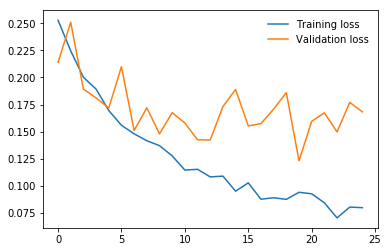

In [145]:
plt.plot(cum_trainlossarray, label='Training loss')
plt.plot(cum_testlossarray, label='Validation loss')
plt.legend(frameon=False)
plt.savefig('cnn_2', dpi=100)
plt.show()